In [1]:
#importing necessary libararies
#nltk.downlaod will be used to download the necessary files

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kalaiyarasan.jacob\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kalaiyarasan.jacob\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Reading the source CSV file and encod
df=pd.read_csv('../Downloads/spam.csv',encoding='latin-1')

In [3]:
#Removing columns which has Nan's or unknown values
df.dropna(axis=1,inplace=True)
df.rename(columns={'v1':'class','v2':'Message'},inplace=True)

df['length'] = df['Message'].map(lambda text: len(text))
print(df.head())


  class                                            Message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


In [4]:
#removing HTML entities by html.unescape
import html
def html_escape(text):
    return html.unescape(text)
df['Message']=df['Message'].apply(html_escape)


In [5]:
def pre_process(text):
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    #text = [word for word in text if word.isalnum()]
    words = ""
    for i in text:
            stemmer = PorterStemmer()
            words += (stemmer.stem(i.lower()))+" "
    return words
   

In [6]:

Features = df['Message'].copy()
Features = Features.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(Features)

features_train, features_test, labels_train, labels_test = train_test_split(features, df['class'], test_size=0.3, random_state=111)

### Model Hyperparameter Tuning

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### SVC tuning of Gamma,C and Kernal

In [8]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X_train, y_train,X_test,y_test):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    krnl = ['rbf','poly','sigmoid']
    param_grid = {'C': Cs, 'gamma' : gammas}
    for i in krnl:
        grid_search = GridSearchCV(SVC(kernel=i), param_grid)
        grid_search.fit(X_train, y_train)
        pred = grid_search.predict(X_test)
        acc=accuracy_score(y_test,pred)
        print(" Model :\n Kernal function:{0}\tAccuracy :{1}\tBest params :{2}".format(i,acc,grid_search.best_params_))
        
svc_param_selection(features_train, labels_train,features_test,labels_test)

 Model :
 Kernal function:rbf	Accuracy :0.9850478468899522	Best params :{'C': 10, 'gamma': 0.1}
 Model :
 Kernal function:poly	Accuracy :0.9300239234449761	Best params :{'C': 10, 'gamma': 1}
 Model :
 Kernal function:sigmoid	Accuracy :0.9820574162679426	Best params :{'C': 10, 'gamma': 0.1}


## Naive bayes tuning of Alpha values

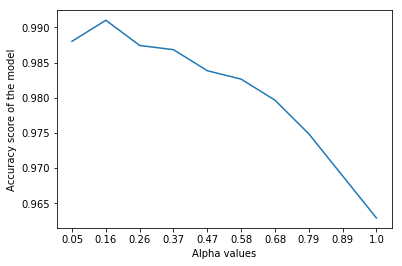

In [9]:
alpha=[i for i in np.round(np.linspace(0.05, 1, num=10),2)]
pred_score=[]
for i in alpha:
    mnb = MultinomialNB(alpha=i)
    mnb.fit(features_train, labels_train)
    prediction = mnb.predict(features_test)
    pred_score.append(accuracy_score(labels_test,prediction))

D=dict(zip(alpha,pred_score))
plt.plot(range(len(D)), list(D.values()))
plt.xticks(range(len(D)), list(D.keys()))
plt.xlabel('Alpha values')
plt.ylabel('Accuracy score of the model')
plt.show()


### SGD Classifier tuning of Alpha 
#### Alpha is a Constant that multiplies the regularization term. Defaults to 0.0001 Also used to compute learning_rate when set to ‘optimal’.Using default regularization as 'L2'

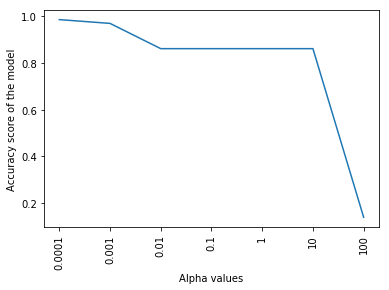

In [10]:
from sklearn.linear_model import SGDClassifier
#alpha=[i for i in np.round(np.linspace(0.0001, 1, num=50),4)]
alpha=[0.0001,0.001,0.01,0.1,1,10,100,]
pred_score=[]
for i in alpha:
    clf=SGDClassifier(alpha=i,max_iter=1000)
    clf.fit(features_train, labels_train)
    prediction = clf.predict(features_test)
    pred_score.append(accuracy_score(labels_test,prediction))
    
D=dict(zip(alpha,pred_score))
plt.plot(range(len(D)), list(D.values()))
plt.xticks(range(len(D)), list(D.keys()),rotation='vertical')
plt.xlabel('Alpha values')
plt.ylabel('Accuracy score of the model')
plt.show()